In [2]:
#Read in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [3]:
#Set pandas preferences
pd.set_option('display.max_columns',150)

#Set matplotlib preferences
plt.style.use('ggplot')

In [4]:
#Import raw data
import os
os.chdir('/Users/ksharma/Documents/Data Science/Projects/TelcoCustomerChurn/Data/CleanedData/')

df= pd.read_csv('cleanedData.csv', index_col= 0)

### Data Overview

In [5]:
#Preview data
display(df.shape)
display(df.head())

(7043, 20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#View info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
#View summary metrics
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [8]:
#View missing data
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### EDA

<AxesSubplot:xlabel='Churn', ylabel='count'>

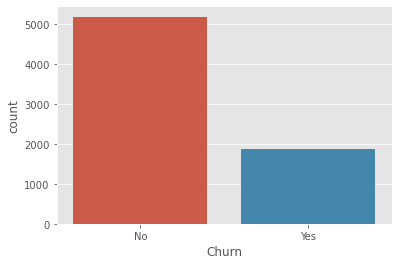

In [9]:
#Target
sns.countplot(x= 'Churn', data=df)

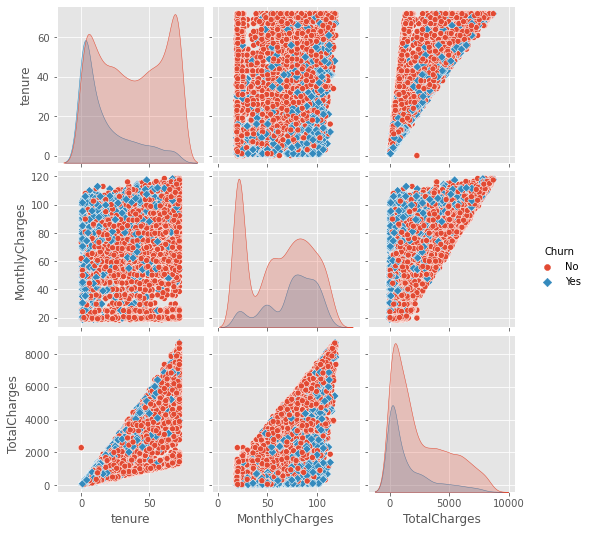

In [10]:
#Pairplot of cols containing numeric data
sns.pairplot(data= df, hue= 'Churn', markers= ['o','D'])

Heatmap

Text(0.5, 1.0, 'Correlation to Churn')

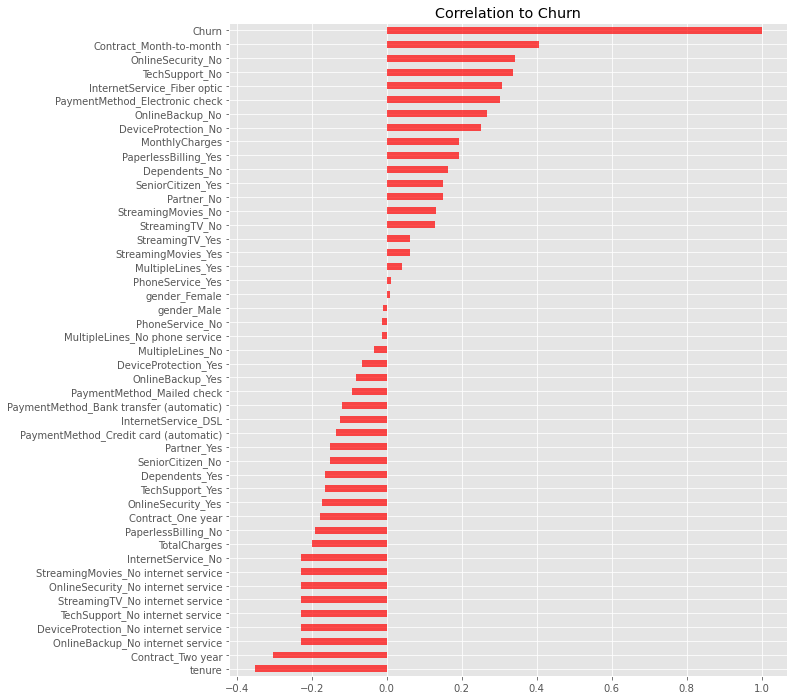

In [11]:
#Create dummy's for categorical data
dummies= df.copy()
dummies.loc[:, 'Churn']= dummies.loc[:, 'Churn'].apply(lambda x: 1 if x== 'Yes' else 0)
dummies= pd.get_dummies(dummies)

#Plot correlation w/ churn
f, ax= plt.subplots(figsize= (10,12))
dummies.corr()['Churn'].sort_values(ascending= True).plot(kind= 'barh', color= 'red', alpha= .7)

ax.set_title('Correlation to Churn')

Plots of strongest correlated features to Churn

In [64]:
#View most correlated features to churn
np.abs(dummies.corr()['Churn']).sort_values(ascending= False)[:6]

Churn                          1.000000
Contract_Month-to-month        0.405103
tenure                         0.352229
OnlineSecurity_No              0.342637
TechSupport_No                 0.337281
InternetService_Fiber optic    0.308020
Name: Churn, dtype: float64

Tenure

Text(0, 0.5, '')

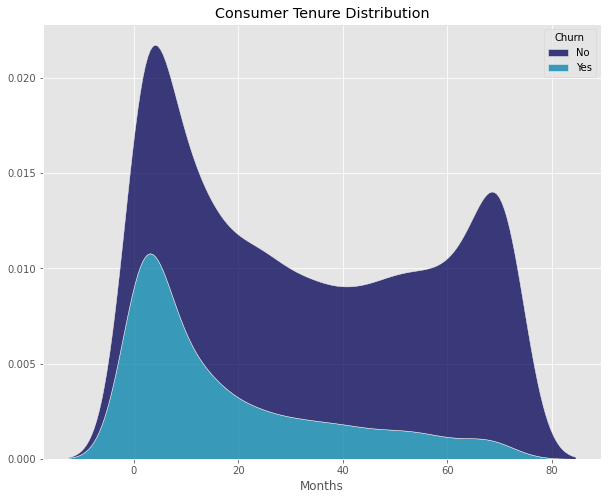

In [31]:
f,ax= plt.subplots(figsize= (10,8))

j= sns.kdeplot(x= 'tenure', data= df, hue= 'Churn',
            palette="ocean", multiple= 'stack', ax= ax)

j.set_title('Consumer Tenure Distribution')
j.set_xlabel('Months')
j.set_ylabel('')

Contract, OnlineSecurity, TechSupport, InternetService

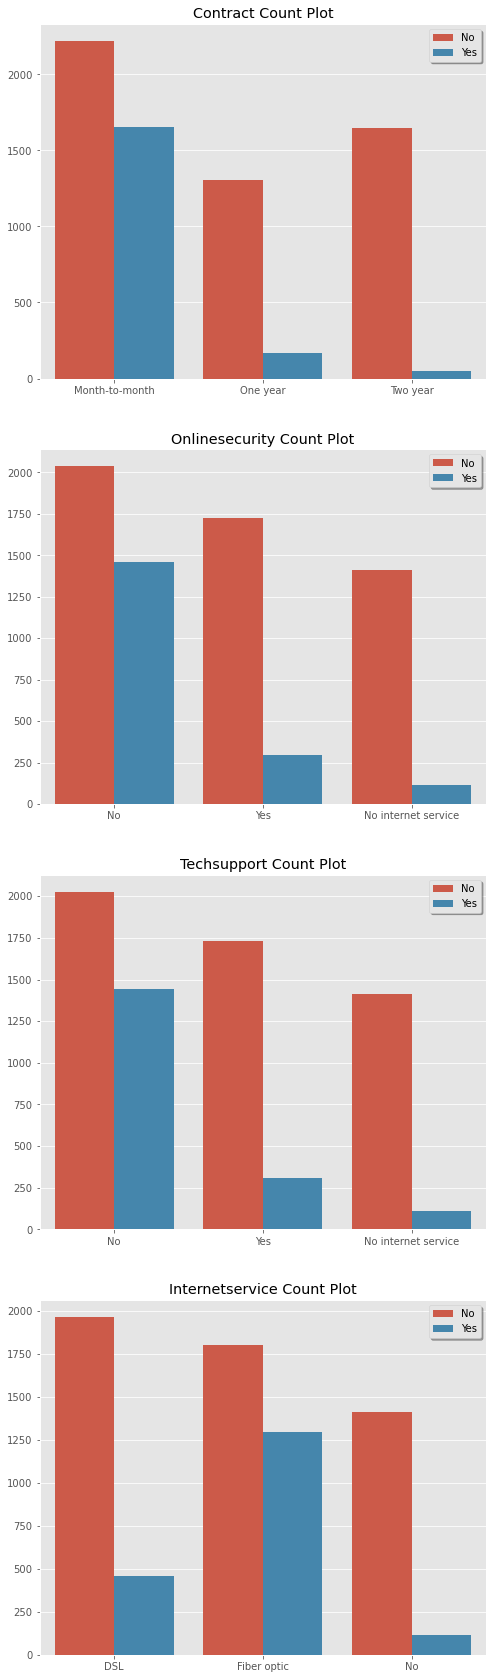

In [65]:
cols= ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService']

#View all countplots with churn hue
f, axes= plt.subplots(4,1, figsize= (8,30))

for col,ax in zip(cols,axes.flatten()):
    j= sns.countplot(x= col, hue='Churn', data=df, ax=ax)
    j.set_title('%s Count Plot' % (str.capitalize(col)))
    j.set_xlabel('')
    j.set_ylabel('')
    j.legend(shadow= True)

View MonthlyCharges histogram by churn

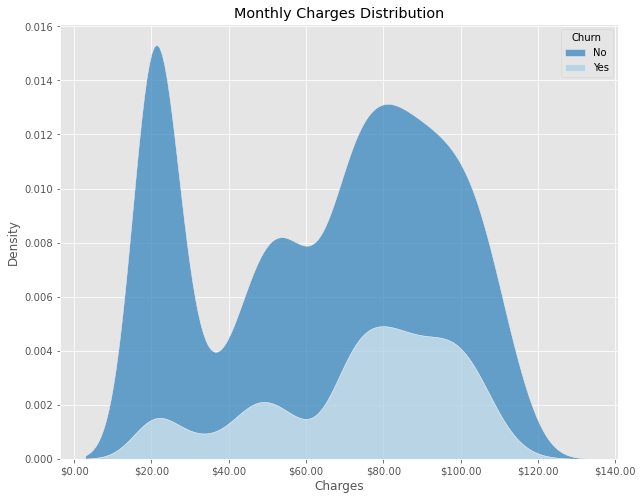

In [38]:
f,ax= plt.subplots(figsize= (10,8))

j= sns.kdeplot(x= 'MonthlyCharges', data= df, hue= 'Churn',
            palette="Blues_r", multiple= 'stack', ax= ax)

#Set aesthetics
j.set_title('Monthly Charges Distribution')
j.set_xlabel('Charges')
j.set_ylabel('')
j.xaxis.set_major_formatter(FormatStrFormatter('$%.2f'))

View TotalCharges histogram by churn

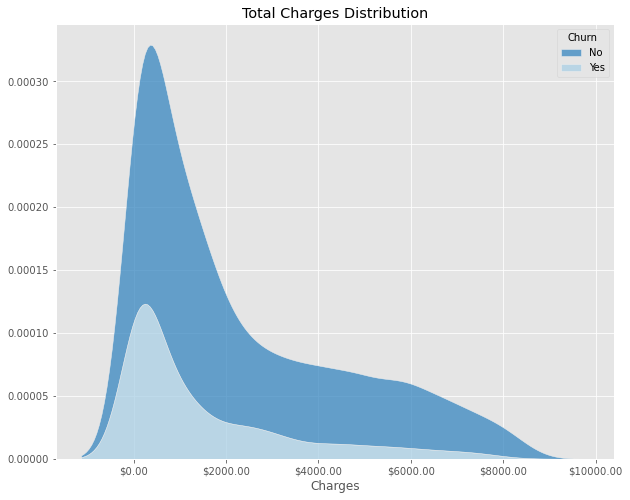

In [41]:
f,ax= plt.subplots(figsize= (10,8))

j= sns.kdeplot(x= 'TotalCharges', data= df, hue= 'Churn',
            palette="Blues_r", multiple= 'stack', ax= ax)

#Set aesthetics
j.set_title('Total Charges Distribution')
j.set_xlabel('Charges')
j.set_ylabel('')
j.xaxis.set_major_formatter(FormatStrFormatter('$%.2f'))